In [224]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_excel
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics
import numpy as np
import numpy
import keras
dataset = read_excel(r'C:\Users\euripab\Desktop\ML Extraction\KSTEST\results6_ClusteringSupervisedData\supervised_all1_7.xlsx')
#dataset = dataset.sample(frac=1, replace=False)
#dataset = dataset.reset_index(drop=True)
dataset

,CQImoyen(t-1),TraficDataDL(t-1),TraficDataUL(t-1),VoIPqualitymeasinsuffstat(t-1),CROZON_NombredeConnexionsPS(t-1),nbUEVoIPqualityOK(t-1),Nbrtentatives_QCi5__TEAVoix(t-1),Tec(t-1),CQImoyen(t),TraficDataDL(t),...,Nbrtentatives_QCi5__TEAVoix(t+5),Tec(t+5),CQImoyen(t+6),TraficDataDL(t+6),TraficDataUL(t+6),VoIPqualitymeasinsuffstat(t+6),CROZON_NombredeConnexionsPS(t+6),nbUEVoIPqualityOK(t+6),Nbrtentatives_QCi5__TEAVoix(t+6),Tec(t+6)
0,0.333333,0.272727,0.230769,0.368421,0.352941,0.948718,0.352941,D,0.375000,0.260870,...,0.333333,D,0.315789,0.250000,0.230769,0.512821,0.375000,0.842105,0.388889,D
1,0.375000,0.260870,0.272727,0.527778,0.352941,0.571429,0.315789,D,0.352941,0.240000,...,0.388889,D,0.400000,0.250000,0.260870,0.627451,0.428571,0.907692,0.388889,D
2,0.352941,0.240000,0.240000,0.444444,0.352941,0.804878,0.285714,D,0.315789,0.285714,...,0.388889,D,0.444444,0.275862,0.347826,0.555556,0.470588,1.000000,0.400000,D
3,0.315789,0.285714,0.250000,0.300000,0.333333,0.365854,0.272727,D,0.400000,0.259259,...,0.400000,D,0.500000,0.333333,0.363636,0.341463,0.444444,0.916667,0.400000,D
4,0.400000,0.259259,0.269231,0.782609,0.538462,1.000000,0.500000,D,0.375000,0.272727,...,0.400000,D,0.421053,0.434783,0.400000,0.446809,0.642857,1.000000,0.600000,D
5,0.375000,0.272727,0.260870,0.319149,0.375000,1.000000,0.285714,D,0.352941,0.206897,...,0.600000,D,0.500000,0.380952,0.320000,0.901961,0.666667,1.000000,0.500000,D
6,0.352941,0.206897,0.222222,0.489796,0.250000,0.962963,0.333333,D,0.315789,0.250000,...,0.500000,D,0.500000,0.333333,0.296296,0.485714,0.571429,0.707317,0.444444,D
7,0.315789,0.250000,0.230769,0.512821,0.375000,0.842105,0.388889,D,0.400000,0.250000,...,0.444444,D,0.416667,0.208333,0.208333,0.513514,0.357143,0.923077,0.227273,D
8,0.400000,0.250000,0.260870,0.627451,0.428571,0.907692,0.388889,D,0.444444,0.275862,...,0.227273,D,0.176471,0.125000,0.125000,0.437500,0.187500,0.682927,0.210526,D
9,0.444444,0.275862,0.347826,0.555556,0.470588,1.000000,0.400000,D,0.500000,0.333333,...,0.210526,D,0.200000,0.130435,0.130435,0.411765,0.187500,0.477273,0.166667,D


In [225]:
#Transform Data Set into Discrete inputs
discrete_dataset = DataFrame()
Sum = 0
for column in dataset.columns:
    Sum+=(len(dataset[column].unique()))
    print(str(len(dataset[column].unique()))+', partial sum = '+str(Sum))
    for value in dataset[column].unique():
        discrete_dataset[column + str(value)] = (dataset[column] == value)
print('SUM = '+str(Sum))          

84, partial sum = 84
128, partial sum = 212
143, partial sum = 355
206, partial sum = 561
92, partial sum = 653
183, partial sum = 836
112, partial sum = 948
3, partial sum = 951
84, partial sum = 1035
127, partial sum = 1162
144, partial sum = 1306
201, partial sum = 1507
92, partial sum = 1599
191, partial sum = 1790
123, partial sum = 1913
3, partial sum = 1916
85, partial sum = 2001
126, partial sum = 2127
143, partial sum = 2270
203, partial sum = 2473
97, partial sum = 2570
195, partial sum = 2765
123, partial sum = 2888
3, partial sum = 2891
84, partial sum = 2975
129, partial sum = 3104
142, partial sum = 3246
202, partial sum = 3448
94, partial sum = 3542
205, partial sum = 3747
122, partial sum = 3869
3, partial sum = 3872
84, partial sum = 3956
139, partial sum = 4095
143, partial sum = 4238
211, partial sum = 4449
94, partial sum = 4543
211, partial sum = 4754
118, partial sum = 4872
3, partial sum = 4875
85, partial sum = 4960
138, partial sum = 5098
142, partial sum = 524

1
2
3
4
5
6
7
8
Train on 5400 samples, validate on 350 samples
Epoch 1/50
 - 2s - loss: 0.1145 - mean_squared_error: 0.1145 - val_loss: 0.0817 - val_mean_squared_error: 0.0817
Epoch 2/50
 - 0s - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.0799 - val_mean_squared_error: 0.0799
Epoch 3/50
 - 0s - loss: 0.1003 - mean_squared_error: 0.1003 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 4/50
 - 0s - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.0760 - val_mean_squared_error: 0.0760
Epoch 5/50
 - 0s - loss: 0.0956 - mean_squared_error: 0.0956 - val_loss: 0.0739 - val_mean_squared_error: 0.0739
Epoch 6/50
 - 0s - loss: 0.0932 - mean_squared_error: 0.0932 - val_loss: 0.0718 - val_mean_squared_error: 0.0718
Epoch 7/50
 - 0s - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.0697 - val_mean_squared_error: 0.0697
Epoch 8/50
 - 0s - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.0679 - val_mean_squared_error: 0.0679
Epoch 9/50
 - 0s - loss: 0.0872 -

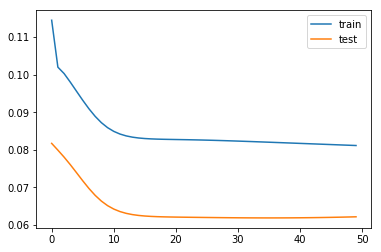

Test RMSE: 0.249


In [226]:
values = dataset.values


n_days_pred = 7
n_days = 1
n_features = 8
n_obs = n_days*n_features
n_train_samples = 5400

# integer encode direction
encoder = LabelEncoder()
encoder.fit(values[:,7])
for i in range(1,n_days+n_days_pred+1):
    print(i)
    values[:,8*i-1] = encoder.transform(values[:,8*i-1])
values = values.astype('float32')
#Scale Data
scaler = MinMaxScaler()
values = scaler.fit_transform(values)


train = values[:n_train_samples, :]
test = values[n_train_samples:, :]
# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, range(0,n_obs)], train[:,n_obs]
test_X, test_y = test[:, range(0,n_obs)], test[:,n_obs]


#Split Values into Classification columns
#train_y = keras.utils.to_categorical(train_y,num_classes=num_classes)
#test_y = keras.utils.to_categorical(test_y,num_classes=num_classes)
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


# design network
model = Sequential()
model.add(Dense(n_obs*4, activation='sigmoid', input_dim =n_obs))
model.add(Dense(n_obs*10, activation='sigmoid'))
model.add(Dense(1,activation = 'relu'))
model.compile(loss='mse', optimizer='adam',metrics=[metrics.mse])
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=36, validation_data=(test_X, test_y),verbose = 2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# make a prediction
yhat = model.predict(test_X)

rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)





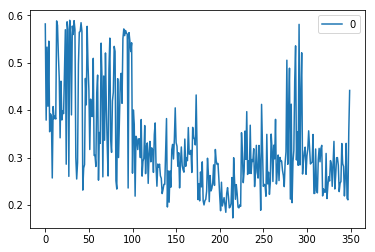

In [227]:
DataFrame(yhat).plot()

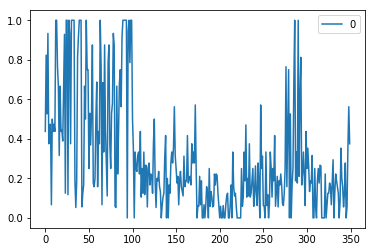

In [228]:
DataFrame(test_y).plot()

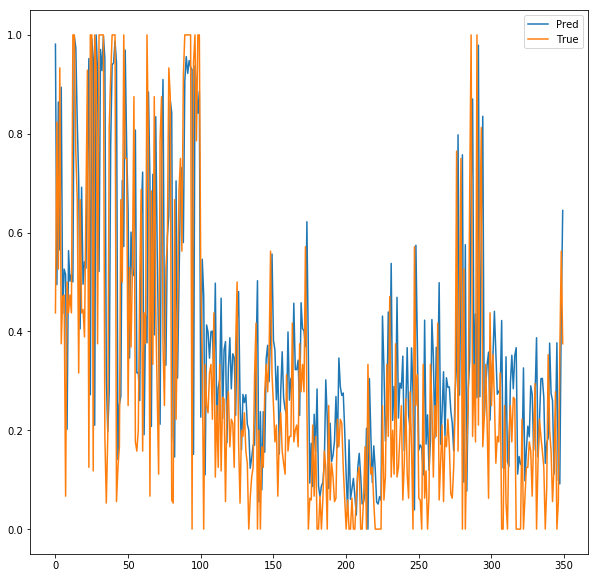

In [229]:
yhat = scaler.fit_transform(yhat)
res = DataFrame()
res['Pred'] = DataFrame(yhat)[0]
res['True'] = DataFrame(test_y)[0]
res.plot(figsize = (10,10))

In [183]:
mask1 = [DataFrame(yhat)[0]>0.5]
numpy.sum(mask1)

6

In [184]:
mask2 = [DataFrame(test_y)[0]>0.5]
numpy.sum(mask2)

10

In [185]:
a = [mask1[i] == mask2[i] for i in range(0,len(mask1))]
numpy.sum(a)/len(test)

0.9066666666666666

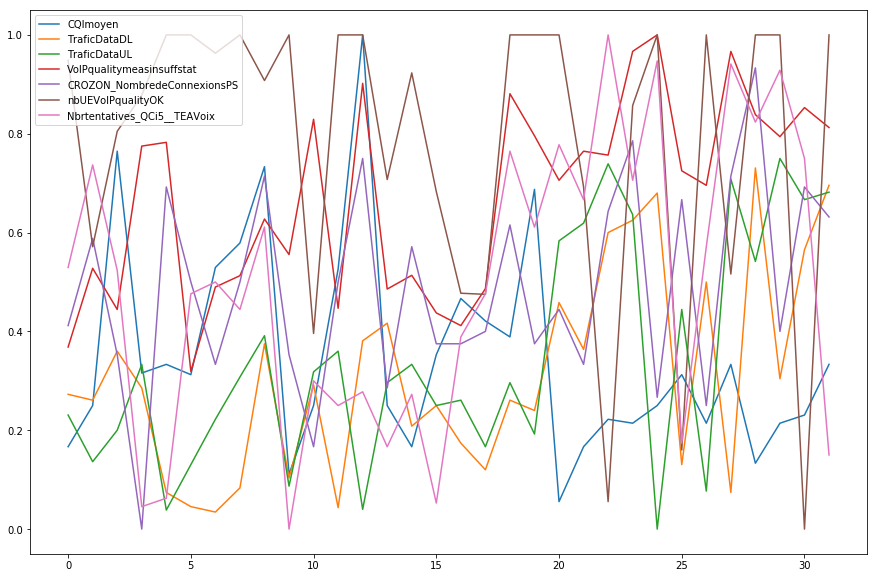

In [255]:
cellKpi= pd.read_excel(r'C:\Users\euripab\Desktop\ML Extraction\KSTEST\results5_ClusteringTimeSeries\clustering_ts_all_D17513C.xlsx')
cellKpi.plot(y =cellKpi.columns, kind='line',figsize = (15,10))

In [256]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [(name+'(t-%d)' % (i)) for name in data.columns]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [name+'(t)' for name in data.columns]
		else:
			names += [(name+'(t+%d)' % (i)) for name in data.columns]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [257]:
example_values = series_to_supervised(cellKpi, n_in=1, n_out=7, dropnan=True).values
for i in range(1,n_days+n_days_pred+1):
    print(i)
    example_values[:,8*i-1] = encoder.transform(example_values[:,8*i-1])
scaler = MinMaxScaler()
example_values = scaler.fit_transform(example_values)

1
2
3
4
5
6
7
8


C:\Users\euripab\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [258]:
example_values_X = example_values[:, range(0,n_obs)]
example_values_y = example_values[:, n_obs+(n_days_pred-1)*n_features]

In [261]:
yhat = model.predict(example_values_X)
#yhat = scaler.fit_transform(yhat)

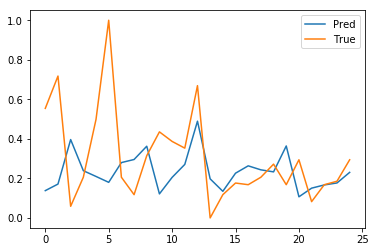

In [262]:
ex = DataFrame()
ex['Pred'] = DataFrame(yhat)[0]
ex['True'] = DataFrame(example_values_y)[0]
ex.plot()